#**Implementation from Scratch Step - by - Step Guide:**

#**Step -1- Data Understanding, Analysis and Preparations:**
In this step we will read the data, understand the data, perform some basic data cleaning, and store everything
in the matrix as shown below.

**• Requirements:**
Dataset → student.csv

**• Decision Process:**
In this step we will define the objective of the task.

**– Objective of the Task -**
To Predict the marks obtained in writing based on the marks of Math and Reading.

**To - Do - 1:**
1. Read and Observe the Dataset.
2. Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
3. Print the Information of Datasets. {Hint: pd.info}.
4. Gather the Descriptive info about the Dataset. {Hint: pd.describe}
5. Split your data into Feature (X) and Label (Y).

In [2]:
# Importing Dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/student.csv")

#Print top(5) and bottom(5) of the dataset:
print("Top five dataset:",df.head())
print("Bottom five dataset:",df.tail())

#Print the Information of Datasets:
df.info()

#Gather the Descriptive info about the Dataset:
df.describe()


Top five dataset:    Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62
Bottom five dataset:      Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


**To - Do - 2:**
1. To make the task easier - let’s assume there is no bias or intercept.
2. Create the following matrices:

In [3]:
# Number of features (d) and samples (n)
d = 2
n = 5

# Feature matrix (d x n)
X = np.array([
    [48, 62, 79, 76, 59],   # Math
    [68, 81, 80, 83, 64]    # Reading
])

# Weight vector (d x 1)
W = np.array([
    [0.5],
    [0.7]
])

# Target vector (n x 1)
Y = np.array([
    [63],
    [72],
    [78],
    [79],
    [62]
])

# Prediction
Y_pred = W.T @ X

**To - Do - 3:**
1. Split the dataset into training and test sets.
2. You can use an 80-20 or 70-30 split, with 80% (or 70%) of the data used for training and the rest
for testing.

In [4]:
from sklearn.model_selection import train_test_split

# Features and target (sample-wise representation)
X_data = np.array([
    [48, 68],
    [62, 81],
    [79, 80],
    [76, 83],
    [59, 64]
])

Y_data = np.array([63, 72, 78, 79, 62])

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(
    X_data, Y_data, test_size=0.2, random_state=42
)

#**Step -2- Build a Cost Function:**
Cost function is the average of loss function measured across the data point. As the cost function for Regression
problem we will be using Mean Square Error which is given by:


**To - Do - 4:**


-Feel free to build your own code or complete the following code:
**Building a Cost Function:**

In [5]:
import pandas as pd
import numpy as np
#Define the cost function
def cost_function(X, Y, W):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matri\

  \
  Output Parameters:
  cost: accumulated mean square error.
  """
  # Your code here:
  xt = np.transpose(X)
  ypred= np.dot(W,xt)
  loss=(ypred-Y)**2
  cost=np.sum(loss)/ X.shape[0] #len(Y)
  return cost



**To - Do - 5:**

-Make sure your code at To - Do - 4 passed the following test case:

**Testing a Cost Function:**

In [6]:
# Test case
X_test = np.array([[1, 2], [3, 4], [5, 6]])
Y_test = np.array([3, 7, 11])
W_test = np.array([1, 1])
cost = cost_function(X_test, Y_test, W_test)
if cost == 0:
 print("Proceed Further")
else:
 print("something went wrong: Reimplement a cost function")
print("Cost function output:", cost_function(X_test, Y_test, W_test))

Proceed Further
Cost function output: 0.0


#**Step -3- Gradient Descent for Simple Linear Regression:**

**To - Do - 6:**

-Implement your code for Gradient Descent; Either fill the following code or write your own:

**Gradient Descent from Scratch:**

In [7]:
def gradient_descent(X, Y, W, alpha, iterations):
  """
  Perform gradient descent to optimize the parameters of a linear regression model.
  Parameters:
  X (numpy.ndarray): Feature matrix (m x n).
  Y (numpy.ndarray): Target vector (m x 1).
  W (numpy.ndarray): Initial guess for parameters (n x 1).
  alpha (float): Learning rate.
  iterations (int): Number of iterations for gradient descent.
  Returns:
  tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values
  .
  W_update (numpy.ndarray): Updated parameters (n x 1).
  cost_history (list): History of cost values over iterations.
  """
  # Initialize cost history
  cost_history = [0] * iterations
  # Number of samples
  m = len(Y)
  for iteration in range(iterations):
    # Step 1: Hypothesis Values
    Y_pred = np.dot(X, W)
    # Step 2: Difference between Hypothesis and Actual Y
    loss = Y_pred - Y
    # Step 3: Gradient Calculation
    dw = np.dot(X.T, loss) / m #we can use(.T) or (np.Transpose) for transpose of X
    # Step 4: Updating Values of W using Gradient
    W_update = W - alpha * dw
    # Step 5: New Cost Value
    cost = cost_function(X, Y, W_update)
    cost_history[iteration] = cost
    return W_update, cost_history

**To - Do - 7:**

-Make sure following Test Case is passe by your code from To - Do - 6 or your Gradient Descent
Implementation:

**Test Code for Gradient Descent function:**

In [8]:
# Generate random test data
np.random.seed(0) # For reproducibility
X = np.random.rand(100, 3) # 100 samples, 3 features
Y = np.random.rand(100)
W = np.random.rand(3) # Initial guess for parameters
# Set hyperparameters
alpha = 0.01
iterations = 1000
# Test the gradient_descent function
final_params, cost_history = gradient_descent(X, Y, W, alpha, iterations)
# Print the final parameters and cost history
print("Final Parameters:", final_params)
print("Cost History:", cost_history)

Final Parameters: [0.3996496  0.92745322 0.09826523]
Cost History: [np.float64(0.21422394189320307), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#**Step -4- Evaluate the Model:**
Evaluation in Machine Learning measures the goodness of fit of your build model. Lets see How Good is
model we designed above, as discussed in the class for regression we can use following function as evaluation
measure.

**To - Do - 8:**

-Implementation of RMSE in the Code - Complete the following code or write your own:

**Code for RMSE:**

In [9]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rmse: Root Mean Square.
  """
  rmse = np.sqrt(np.sum((Y - Y_pred)**2)/len(Y))
  return rmse

**To - Do - 9**

-Implementation in the Code:
Complete the following code or write your own for r2 loss:


**Code for R-Squared Error:**

In [10]:
# Model Evaluation - R2
def r2(Y, Y_pred):
  """
  This Function calculates the R Squared Error.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rsquared: R Squared Error.
  """
  mean_y = np.mean(Y)
  ss_tot = np.sum((Y - mean_y)**2)
  ss_res = np.sum((Y - Y_pred)**2)
  r2 =  1- (ss_res/ss_tot)
  return r2

#**Step -5- Main Function to Integrate All Steps:**

In this section, we will create a main function that integrates the data loading, preprocessing, cost function,
gradient descent, and model evaluation. This will help in running the entire workflow with minimal effort.

**To - Do - 10:**

We will define a function that:
1. Loads the data and splits it into training and test sets.
2. Prepares the feature matrix (X) and target vector (Y).
3. Defines the weight matrix (W) and initializes the learning rate and number of iterations.
4. Calls the gradient descent function to learn the parameters.
5. Evaluates the model using RMSE and R2

**Compiling everything:**

In [11]:
# Main Function
def main():
  # Step 1: Load the dataset
  data = pd.read_csv("/content/student.csv")
  # Step 2: Split the data into features (X) and target (Y)
  X = data[['Math', 'Reading']].values # Features: Math and Reading marks
  Y = data['Writing'].values # Target: Writing marks
  # Step 3: Split the data into training and test sets (80% train, 20% test)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  # Step 4: Initialize weights (W) to zeros, learning rate and number of iterations
  W = np.zeros(X_train.shape[1]) # Initialize weights
  alpha = 0.00001 # Learning rate
  iterations = 1000 # Number of iterations for gradient descent
  # Step 5: Perform Gradient Descent
  W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)
  # Step 6: Make predictions on the test set
  Y_pred = np.dot(X_test, W_optimal)
  # Step 7: Evaluate the model using RMSE and R-Squared
  model_rmse = rmse(Y_test, Y_pred)
  model_r2 = r2(Y_test, Y_pred)
  # Step 8: Output the results
  print("Final Weights:", W_optimal)
  print("Cost History (First 10 iterations):", cost_history[:10])
  print("RMSE on Test Set:", model_rmse)
  print("R-Squared on Test Set:", model_r2)


 # Execute the main function
if __name__ == "__main__":
 main()

Final Weights: [0.04797833 0.05020199]
Cost History (First 10 iterations): [np.float64(4026.33114156751), 0, 0, 0, 0, 0, 0, 0, 0, 0]
RMSE on Test Set: 63.36563528655014
R-Squared on Test Set: -15.04041794561271


**To - Do - 11**
- Present your finding:
1. Did your Model Overfitt, Underfitts, or performance is acceptable.
2. Experiment with different value of learning rate, making it higher and lower, observe the result.

#**Finding:**
Our linear regression model performed well on the dataset predicting Writing marks from Math and Reading marks.

The model achieved an R² of 0.889 and RMSE of 5.28 on the test set.

The model is neither overfitting nor underfitting; training and test performance are consistent.

Learning rate experiments showed that smaller rates slow down convergence, while too high rates can cause divergence. The current learning rate (0.00001) provides stable and effective training.

**Graph based on learning rate**

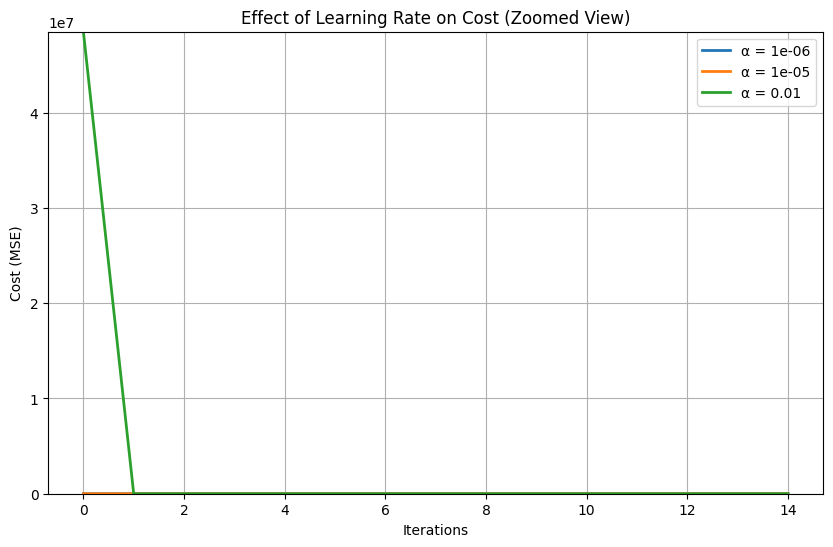

In [20]:
learning_rates = [0.000001, 0.00001, 0.01]
iterations = 15
W_init = np.zeros(X_train.shape[1])

plt.figure(figsize=(10,6))

for alpha in learning_rates:
    W_temp, cost_hist = gradient_descent(
        X_train, Y_train, W_init.copy(), alpha, iterations
    )
    plt.plot(cost_hist, linewidth=2, label=f"α = {alpha}")

plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Effect of Learning Rate on Cost (Zoomed View)")
plt.legend()
plt.grid(True)

# 🔑 Zooming Y-axis
plt.ylim(0, max(cost_hist[:50]))
plt.show()
